In [ ]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf
# # 이 셀을 실행한 후에 '런타임->런타임 다시 시작'
# # 그리고 이 셀은 다시 실행하지 않는다!!!

In [ ]:
# 형태소 분석 라이브러리 설치
!pip install konlpy pandas seaborn gensim wordcloud python-mecab-ko wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.6/575.6 kB 22.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 35.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 12.7 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=1ade72b9ef568a31aadab61ed792cbb6cb662c20b1f17f3f639a3eb02458e935
  Stored in directory: /root/.cache/pip/wheels/04/5f/3e/46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget


In [ ]:
# 라이브러리
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from mecab import MeCab
from IPython.display import display
from wordcloud import WordCloud
from collections import Counter
import wget, os
import itertools
import nltk


# 한글 폰트 설정
plt.rcParams['font.family'] = 'NanumBarunGothic' # 나눔바른고딕 적용하기

# row 모두 출력
pd.options.display.max_rows = None

# nltk 사용
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 데이터 불러오기
dataset_path = '/content/drive/MyDrive/value up/dataset/'
data = pd.read_csv(dataset_path + 'complain_JungGu.csv')

data.head()

,title,content,dept
0,달성공원 새벽시장근처 환경개선이 시급합니다.,달성파크푸르지오힐스테이트 입주예정자입니다.\n갈때마다 새벽시장으로 인한 악취 및 쓰...,도시안전국 건설과
1,신축건물공사로 인한 안전보호,지난 4월10일 남산정 마음이음공간 설명회에서\n모든 설명 질문이 끝난후 마지막으로...,도시안전국 도시재생과
2,아파트건설현장 주변아파트 피해민원,아파트 건설현장에서 발생하는 소음 먼지 불법주차 등의 안전 위협에 관한 민원\n\n...,도시안전국 건축주택과
3,건들바위역 4번 출구 인근 교차로 볼록렌즈 교체 요청,대구광역시 중구 명덕로55길 6 인근 교차로 볼록렌즈가 파손되었습니다.\n볼록렌즈를...,도시안전국 교통과
4,경북대학교병원 응급실 앞 노상주차장 이용,"2023년 4월 5일 08:00-17:35까지 경북대학교병원 응급실 앞, 수산교회 ...",도시안전국 교통과


In [ ]:
# 제목과 내용을 합치고 title 열 제거
data['content'] = data['title'] + ' ' + data['content']
data = data.drop(['title'], axis=1)

data.head()

,content,dept
0,달성공원 새벽시장근처 환경개선이 시급합니다. 달성파크푸르지오힐스테이트 입주예정자입니...,도시안전국 건설과
1,신축건물공사로 인한 안전보호 지난 4월10일 남산정 마음이음공간 설명회에서\n모든 ...,도시안전국 도시재생과
2,아파트건설현장 주변아파트 피해민원 아파트 건설현장에서 발생하는 소음 먼지 불법주차 ...,도시안전국 건축주택과
3,건들바위역 4번 출구 인근 교차로 볼록렌즈 교체 요청 대구광역시 중구 명덕로55길 ...,도시안전국 교통과
4,경북대학교병원 응급실 앞 노상주차장 이용 2023년 4월 5일 08:00-17:35...,도시안전국 교통과


In [ ]:
# 'length' 열 추가
data['length'] = data['content'].apply(lambda x: len(x))

data.head()

,content,dept,length
0,달성공원 새벽시장근처 환경개선이 시급합니다. 달성파크푸르지오힐스테이트 입주예정자입니...,도시안전국 건설과,238
1,신축건물공사로 인한 안전보호 지난 4월10일 남산정 마음이음공간 설명회에서\n모든 ...,도시안전국 도시재생과,964
2,아파트건설현장 주변아파트 피해민원 아파트 건설현장에서 발생하는 소음 먼지 불법주차 ...,도시안전국 건축주택과,1165
3,건들바위역 4번 출구 인근 교차로 볼록렌즈 교체 요청 대구광역시 중구 명덕로55길 ...,도시안전국 교통과,173
4,경북대학교병원 응급실 앞 노상주차장 이용 2023년 4월 5일 08:00-17:35...,도시안전국 교통과,620


In [ ]:
# 단변량 분석 함수(수치형)
def eda1_n(data, var, bins = 50):
    # 기초통계량
    display(data[[var]].describe().T)
    
    # 시각화
    plt.figure(figsize=(8,10))
    
    plt.subplot(2,1,1)
    sns.histplot(x=var, data=data, bins=bins, kde=True)

    plt.subplot(2,1,2)
    sns.boxplot(x=var, data=data)

    plt.grid()
    plt.plot()

In [ ]:
# 단변량 분석 함수(범주형)
def eda1_c(data, var):
    # 범주별 빈도수
    print(data[var].value_counts())
    # 범주별 비율
    # print(data[var].value_counts() / data[var].shape[0])

    # 시각화
    counts = data[var].value_counts().to_frame().reset_index()
    counts.columns = ['x', 'count']
    counts = counts.sort_values(by='count', ascending=False)[:30] # 상위 n개 출력

    plt.figure(figsize=(10,3))
    sns.countplot(data=data, x=var, order=counts['x'])
    plt.xticks(rotation=45, ha='right')
    plt.grid()
    plt.show()

도시관광국 건축주택과        633
도시안전국 건축주택과        421
환경건설국 교통과          405
도시관광국 건설과          134
안전행정국 경제과          115
환경건설국 녹색환경과        102
도시안전국 교통과           92
주민생활지원국 환경과         77
도시국 도시관리과           72
도시재생국 도시재생과         71
보건소 보건과             61
관광경제국 문화교육과         60
행정지원국 경제과           56
총무국 총무과             52
환경건설국 건축주택과         50
환경건설국 건설안전과         47
도시재생국 관광자원과         47
도시안전국 건설과           42
주민생활지원국 문화관광과       41
관광경제국 환경자원과         34
기획예산실               30
도시안전국 도시재생과         27
주민생활지원국 위생과         25
행정지원국 행정지원과         22
복지문화국 문화진흥과         21
주민생활지원국 주민복지과       19
행정지원국 종합민원과         19
환경건설국 건설과           17
행정복지국 위생과           16
주민생활지원국 녹색환경과       15
도시국 교통행정과           15
관광경제국 관광진흥과         14
행정복지국 복지정책과         13
관광경제국 일자리경제과        12
전략경영실               11
안전행정국 민원토지과          9
행정복지국 민원토지과          9
행정복지국 행정지원과          8
주민생활지원국 주민생활지원과      8
도시재생국 일자리경제과         8
보건소 위생과              8
환경건설국 환경자원과          8
행정지원국 세무과            7
도시재생국 문화개발과

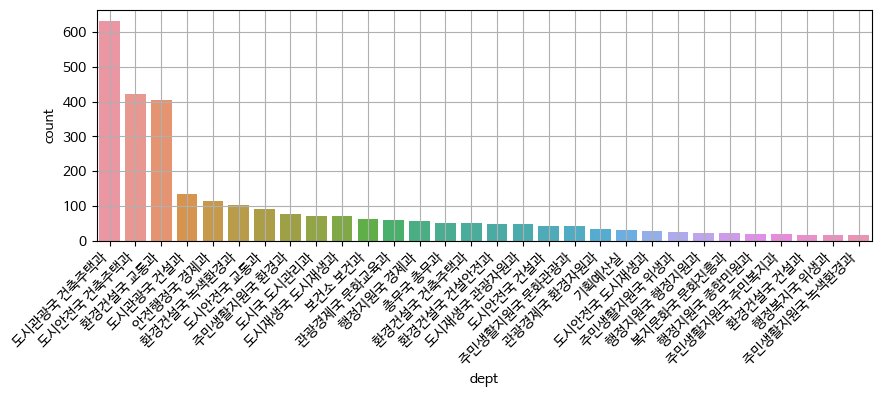

In [ ]:
eda1_c(data, 'dept')

,count,mean,std,min,25%,50%,75%,max
length,3026.0,604.362194,1504.814308,28.0,260.0,454.5,717.0,78847.0


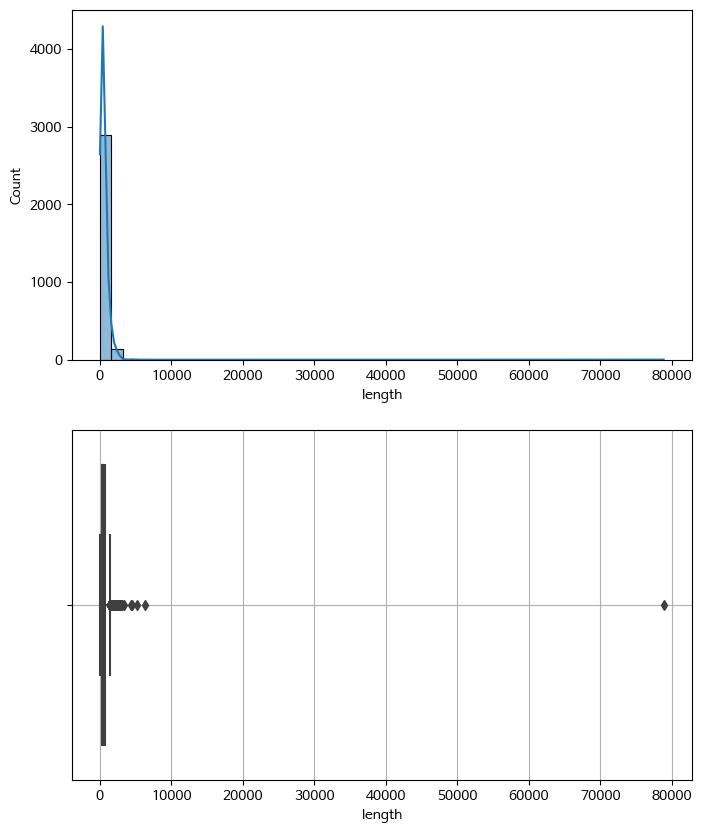

In [ ]:
eda1_n(data, 'length')

In [ ]:
### 1차 전처리

In [ ]:
# 이상치 확인
data.loc[data['length'] > 70000]['content'].to_numpy()

array(['♣ 엄청난 복지 ◆ 먼저 이 긴급한 사건을 가족이나 고장. 국가. 북한지도자와 동포들에서 전세계로 번역하여 전하고 복사해 메일로 알려 사랑하는 사람이 지옥엔 못가도록 도와 진실로 사후 영광된 인생이 되도록 여러분이 각자 도울때 그 축복은 본인. 아들딸과 손자에서 후손이 땅에서 행복하게 살고 당신이 죽어도 천국의 황홀한 영화로움으로 하늘나라에서 면류관의 영광될 것이다.\n~~~~~~~~~~~~~~~~~~~~~~~\n\n\n\n안녕하세요.\n\n\n\n이 비밀은 여러분 각자 목숨이 천국과 지옥이란 아주 심각한 사건으로 종교가 아닌 살생부의 명단이 될것이고 해서 이 엄청난 영광과 저주에서 창조의 비밀을 진짜로 거짓없이 전합니다.\n\n\n\n여러분은 죽음속 부활도 모른체 살았고 죽어 짐승이 되는지 아님 식물이 되는지 죽음속 영혼세계를 모르고 살았으며 지금도 죽어가지만 여러분이 죽어 어떻게 되는지 이 한가지 사실만 알아도 큰 축복이고 이젠 천국과 지옥은 오직 "창주주" 믿음의 행위로 당신몫이 될 것이며 이 사건은 피조물인 인간의 잣대로 과학이나 물리적으로 설명되지 않는 신비의 사건이기 때문이다.\n\n\n\n이 엄청난 비밀은 1000억원을 줘도 못사는 가치로 죽어 지옥가면 하늘나라 시체로 이젠 죽음의 세계를 알고 실천하여 100조원을 줘도 못사는 선물과 보물인 구원의 천국을 소유하면 여러분은 최고 부자의 돈벼락을 받은 인생이라 이젠 "창조주" 자녀로 행복한 사후 천국낙원에서 뵙길 바랍니다.....당신의 옳바른 결단만이 천국으로 인도할 것입니다.\n\n\n\n인간은 누구든 살기 힘들다고 자살하면 무조건 공포의 지옥에 갈것이며 당신은 창조주께서 세상에 보낸 소유물로 자살은 마귀. 사단. 귀신인 악령의 유혹이라 절대로 자살하지 마시고 나도 엄청난 고통속에 하루에도 몇번씩 죽음의 세계와 세상을 생각했지만 죽을힘이 있다면 죽을 힘을 다하여 참고 기도로 이기시면 만류의 아버지께서 지켜주실 것입니다.견디세요.\n\n\n\n아버지께서는 진짜로 사랑하는 아들딸은 죽음의

In [ ]:
# 이상치 제거
data = data.drop(data[data['length'] > 70000].index)

data.head()

,content,dept,length
0,달성공원 새벽시장근처 환경개선이 시급합니다. 달성파크푸르지오힐스테이트 입주예정자입니...,도시안전국 건설과,238
1,신축건물공사로 인한 안전보호 지난 4월10일 남산정 마음이음공간 설명회에서\n모든 ...,도시안전국 도시재생과,964
2,아파트건설현장 주변아파트 피해민원 아파트 건설현장에서 발생하는 소음 먼지 불법주차 ...,도시안전국 건축주택과,1165
3,건들바위역 4번 출구 인근 교차로 볼록렌즈 교체 요청 대구광역시 중구 명덕로55길 ...,도시안전국 교통과,173
4,경북대학교병원 응급실 앞 노상주차장 이용 2023년 4월 5일 08:00-17:35...,도시안전국 교통과,620


In [ ]:
# 이상치 제거
data = data.drop(data[data['dept'] == '-'].index)

data['dept'].unique()

array(['도시안전국 건설과', '도시안전국 도시재생과', '도시안전국 건축주택과', '도시안전국 교통과',
       '관광경제국 관광진흥과', '보건소 보건과', '관광경제국 환경자원과', '대봉2동', '남산4동',
       '행정복지국 복지정책과', '관광경제국 문화교육과', '관광경제국 일자리경제과', '도시안전국 안전총괄과',
       '행정복지국 민원토지과', '행정복지국 생활지원과', '행정복지국 행정지원과', '봉산문화회관', '보건소 위생과',
       '대신동', '삼덕동', '기획예산실', '홍보소통실', '환경건설국 환경자원과', '환경건설국 교통과',
       '환경건설국 건축주택과', '도시재생국 도시재생과', '환경건설국 안전총괄과', '환경건설국 건설과',
       '도시재생국 문화개발과', '도시재생국 관광자원과', '성내1동', '도시재생국 일자리경제과', '도심활성화지원단',
       '환경건설국 녹색환경과', '환경건설국 건설안전과', '행정복지국 위생과', '성내3동', '도시관광국 건축주택과',
       '행정지원국 경제과', '복지문화국 복지정책과', '복지문화국 문화진흥과', '성내2동', '전략경영실',
       '행정지원국 세무과', '동인동', '행정지원국 행정지원과', '안전행정국 경제과', '안전행정국 안전행정과',
       '복지문화국 가족복지과', '안전행정국 세무과', '도시관광국 건설과', '안전행정국 민원토지과',
       '복지문화국 복지지원과', '주민생활지원국 문화관광과', '주민생활지원국 주민복지과', '주민생활지원국 위생과',
       '도시국 도시관리과', '주민생활지원국 녹색환경과', '행정지원국 종합민원과', '주민생활지원국 환경과',
       '주민생활지원국 주민생활지원과', '대봉1동', '남산1동', '남산2동', '도시국 재난안전과', '총무국 세무과',
       '도시국 교통행정과', '사회산업국 환경관리과', '총무국 총무

In [ ]:
# # '\n' 제거하고 ' ' 공백으로 대체
# data['content'] = data['content'].apply(lambda x: x.replace('\n', ' '))

# data.head()

In [ ]:
# # 특수문자 제거
# data['content'] = data['content'].apply(lambda x: x.replace('!', ''))

# data.head()

In [ ]:
#맞춤법 검사전 개행문자,이모티콘,특수기호,숫자 제거
#불용어 사전
stop_words='''1 2 3 4 5 6 7 8 9 ! ? / ~ @ # $ % ^ & * _ \n ㅡㅡ ㅜㅜ ^^  ㅋ ㅋㅋ  ㅋㅋㅋ ㅋㅋㅋㅋ ㅋㅋㅋㅋㅋ ㅋㅋㅋㅋㅋㅋㅋ '''
stop_words=stop_words.split(' ')

#불용어 제거
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize 

for idx, sentence in enumerate(data['content']) :
  word_tokens = word_tokenize(sentence)
  result=[]
  for w in word_tokens: 
    if w not in stop_words: 
        result.append(w) 
    data['content'][idx] = " ".join(result)  

data.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-18-f52670a028fa>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['content'][idx] = " ".join(result)
<ipython-input-18-f52670a028fa>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['content'][idx] = " ".join(result)
<ipython-input-18-f52670a028fa>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  da

,content,dept,length
0,달성공원 새벽시장근처 환경개선이 시급합니다 . 달성파크푸르지오힐스테이트 입주예정자입...,도시안전국 건설과,238
1,신축건물공사로 인한 안전보호 지난 4월10일 남산정 마음이음공간 설명회에서 모든 설...,도시안전국 도시재생과,964
2,아파트건설현장 주변아파트 피해민원 아파트 건설현장에서 발생하는 소음 먼지 불법주차 ...,도시안전국 건축주택과,1165
3,건들바위역 4번 출구 인근 교차로 볼록렌즈 교체 요청 대구광역시 중구 명덕로55길 ...,도시안전국 교통과,173
4,경북대학교병원 응급실 앞 노상주차장 이용 2023년 4월 5일 08:00-17:35...,도시안전국 교통과,620


In [ ]:
### 맞춤법 검사(hanspell 설치)

In [ ]:
! git clone https://github.com/jungin500/py-hanspell

Cloning into 'py-hanspell'...
remote: Enumerating objects: 106, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 106 (delta 9), reused 11 (delta 2), pack-reused 81
Receiving objects: 100% (106/106), 26.42 KiB | 8.81 MiB/s, done.
Resolving deltas: 100% (46/46), done.


In [ ]:
ls

drive/  py-hanspell/  sample_data/


In [ ]:
cd py-hanspell

/content/py-hanspell


In [ ]:
!python setup.py install

/usr/local/lib/python3.9/dist-packages/setuptools/dist.py:755: SetuptoolsDeprecationWarning: Invalid dash-separated options
!!

        ********************************************************************************
        Usage of dash-separated 'description-file' will not be supported in future
        versions. Please use the underscore name 'description_file' instead.

        By 2023-Sep-26, you need to update your project and remove deprecated calls
        or your builds will no longer be supported.

        See https://setuptools.pypa.io/en/latest/userguide/declarative_config.html for details.
        ********************************************************************************

!!
  opt = self.warn_dash_deprecation(opt, section)
running install
/usr/lib/python3.9/distutils/cmd.py:62: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup

In [ ]:
# 데이터 복사하여 temp_data에 저장
# temp_data = data[2076:2090].copy() # 테스트하기 위해 일부만 슬라이싱해서 끊어서 테스트
temp_data = data.copy()

# 'length' 열 제거
temp_data = temp_data.drop('length', axis=1)

temp_data.head()

,content,dept
0,달성공원 새벽시장근처 환경개선이 시급합니다 . 달성파크푸르지오힐스테이트 입주예정자입...,도시안전국 건설과
1,신축건물공사로 인한 안전보호 지난 4월10일 남산정 마음이음공간 설명회에서 모든 설...,도시안전국 도시재생과
2,아파트건설현장 주변아파트 피해민원 아파트 건설현장에서 발생하는 소음 먼지 불법주차 ...,도시안전국 건축주택과
3,건들바위역 4번 출구 인근 교차로 볼록렌즈 교체 요청 대구광역시 중구 명덕로55길 ...,도시안전국 교통과
4,경북대학교병원 응급실 앞 노상주차장 이용 2023년 4월 5일 08:00-17:35...,도시안전국 교통과


In [ ]:
from hanspell import spell_checker
import requests

In [ ]:
# text 입력 -> 맞춤법 검사 완료한 new_str 반환하는 함수
def spell(text):
    # 500자 단위로 슬라이싱
    ready_list = []
    while (len(text) > 500):
        temp_str = text[:500]
        last_space = temp_str.rfind(' ') # 앞에서 가장 가까운 공백 ' ' 위치를 찾는다
        temp_str = text[0:last_space]
        ready_list.append(temp_str) # 문자열을 약 500자 단위로 나누어 리스트에 추가한다.

        text = text[last_space:] # 슬라이싱 한 문자는 text에서 제거
    ready_list.append(text) # 500자 이하로 남은 문자열을 마지막에 추가한다.
    
    new_str = ''
    for ready in ready_list:
        result = spell_checker.check(ready)
        st = result.as_dict()['checked']

        new_str = new_str + ' ' + st # 한 string으로 이어주기

    return new_str

In [ ]:
# 몇번째 행 실행중인지 출력
i = 0
def spell_and_count(x):
    global i
    i += 1
    print(f'Processing row {i}')
    return spell(x)

temp_data['content'] = temp_data['content'].apply(lambda x: spell_and_count(x))

Processing row 1
Processing row 2
Processing row 3
Processing row 4
Processing row 5
Processing row 6
Processing row 7
Processing row 8
Processing row 9
Processing row 10
Processing row 11
Processing row 12
Processing row 13
Processing row 14
Processing row 15
Processing row 16
Processing row 17
Processing row 18
Processing row 19
Processing row 20
Processing row 21
Processing row 22
Processing row 23
Processing row 24
Processing row 25
Processing row 26
Processing row 27
Processing row 28
Processing row 29
Processing row 30
Processing row 31
Processing row 32
Processing row 33
Processing row 34
Processing row 35
Processing row 36
Processing row 37
Processing row 38
Processing row 39
Processing row 40
Processing row 41
Processing row 42
Processing row 43
Processing row 44
Processing row 45
Processing row 46
Processing row 47
Processing row 48
Processing row 49
Processing row 50
Processing row 51
Processing row 52
Processing row 53
Processing row 54
Processing row 55
Processing row 56
P

In [ ]:
# 검사 결과 확인
temp_data.head()

,content,dept
0,달성 공원 새벽시장 근처 환경개선이 시급합니다. 달성 파크푸르지오 힐스테이트 입주...,도시안전국 건설과
1,신축 건물 공사로 인한 안전보호 지난 4월 10일 남산정 마음이 음 공간 설명회에...,도시안전국 도시재생과
2,아파트 건설 현장 주변 아파트 피해 민원 아파트 건설 현장에서 발생하는 소음 먼지...,도시안전국 건축주택과
3,건들 바위 역 4번 출구 인근 교차로 볼록렌즈 교체 요청 대구광역시 중구 명덕로 ...,도시안전국 교통과
4,경북대학교병원 응급실 앞 노상주차장 이용 2023년 4월 5일 08:00-17:3...,도시안전국 교통과


In [ ]:
cd /content

/content


In [ ]:
pwd

'/content'

In [ ]:
# .csv로 저장
temp_data.to_csv('complain_JungGu_spell.csv', index = False)

In [ ]:
# 검사 결과 다운로드
from google.colab import files

files.download('/content/complain_JungGu_spell.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
### 맞춤법 검사 결과 불러오기
data = pd.read_csv('/content/complain_JungGu_spell.csv')

data

,content,dept
0,달성 공원 새벽시장 근처 환경개선이 시급합니다. 달성 파크푸르지오 힐스테이트 입주...,도시안전국 건설과
1,신축 건물 공사로 인한 안전보호 지난 4월 10일 남산정 마음이 음 공간 설명회에...,도시안전국 도시재생과
2,아파트 건설 현장 주변 아파트 피해 민원 아파트 건설 현장에서 발생하는 소음 먼지...,도시안전국 건축주택과
3,건들 바위 역 4번 출구 인근 교차로 볼록렌즈 교체 요청 대구광역시 중구 명덕로 ...,도시안전국 교통과
4,경북대학교병원 응급실 앞 노상주차장 이용 2023년 4월 5일 08:00-17:3...,도시안전국 교통과
5,봉산문화길 인도 공사 첨부한 동영상 보시면 아시겠지만 저희 가게 문 앞을 다 막아...,도시안전국 건설과
6,계산성당 후문 출입구 정비 부탁드립니다. 계산성당 후문 출입구 쪽 바닥이 너무 노...,관광경제국 관광진흥과
7,대구시청 근처 하수로 냄새 좋다 아주 좋아요 메탄가스 건강에도 좋은 건 널리 알려...,도시안전국 건설과
8,서문시장 5지구 앞 버스 번호판 팻말 3월 25일 오후 버스정류소 앞 팻말 팻말 ...,도시안전국 교통과
9,신호 대기 중에도 주차단속 ㅋㅋㅋㅋㅋㅋ 구미에 살고 있는 38살 직장인입니다. 대...,도시안전국 교통과


In [ ]:
# 다시 'length' 열 계산
data['length'] = data['content'].apply(lambda x: len(x))

data.head()

,content,dept,length
0,달성 공원 새벽시장 근처 환경개선이 시급합니다. 달성 파크푸르지오 힐스테이트 입주...,도시안전국 건설과,246
1,신축 건물 공사로 인한 안전보호 지난 4월 10일 남산정 마음이 음 공간 설명회에...,도시안전국 도시재생과,1007
2,아파트 건설 현장 주변 아파트 피해 민원 아파트 건설 현장에서 발생하는 소음 먼지...,도시안전국 건축주택과,1167
3,건들 바위 역 4번 출구 인근 교차로 볼록렌즈 교체 요청 대구광역시 중구 명덕로 ...,도시안전국 교통과,169
4,경북대학교병원 응급실 앞 노상주차장 이용 2023년 4월 5일 08:00-17:3...,도시안전국 교통과,635


,count,mean,std,min,25%,50%,75%,max
length,3024.0,595.739749,502.336353,31.0,268.0,470.0,733.0,6333.0


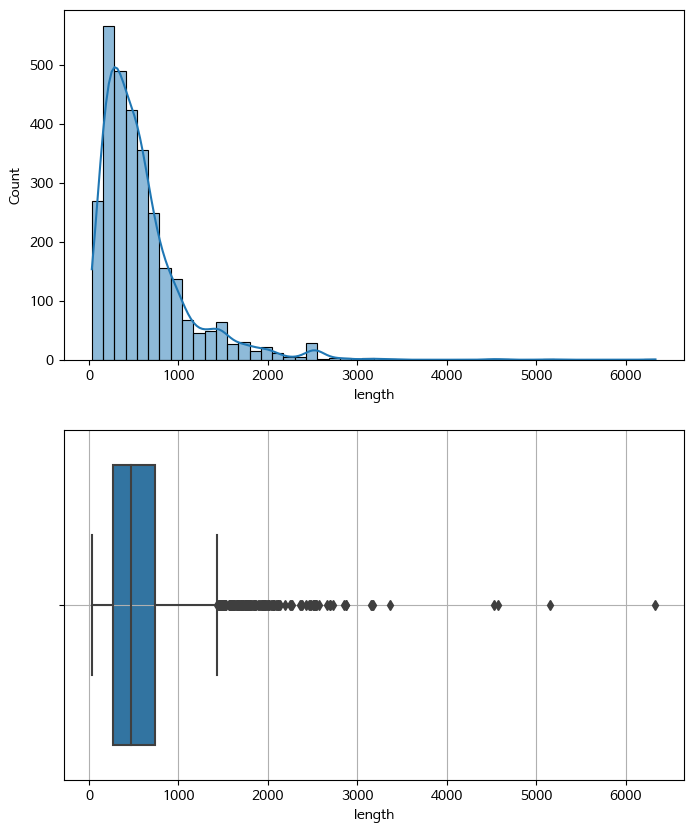

In [ ]:
# 다시 'length' 단변량 분석
eda1_n(data, 'length')

In [ ]:
def text_analysis(df, dept):
    # 1. 지정한 dept의 content만 리스트로 추출 -> text_list
    if dept == None:
        text_list = list(df['content'])
    else : 
        text_list = list(df.loc[df['dept']==dept, 'content'])
    print(f'{dept} 데이터 수 : {len(text_list)}')

    # 2. 분석기로는 mecab 사용
    mecab = MeCab()

    # 3. 명사 추출하여 띄어쓰기 단위로 구분
    for idx, sentence in enumerate(text_list) :
        text_list[idx] = " ".join(mecab.nouns(sentence))

    # 4. 토큰 별 개수를 표로 출력하기
    texts = ' '.join(text_list) # 클래스 구분 없이 하나의 문장으로 전부 합치기
    words = texts.split() # 단어가 띄어쓰기로 구분되어 있으니 나누기
    count = Counter(words)

    count_df = pd.DataFrame.from_dict(count, orient='index', columns=['Count']) # Counter 객체를 pandas의 DataFrame으로 변환
    count_df.index.name = 'Value' # 인덱스 이름 설정
    count_df = count_df.sort_values(by='Count', ascending=False) # 내림차순으로 정렬

    display(count_df.head(20).transpose()) # 상위 20 단어 출력
    display(count_df.tail(20).transpose()) # 하위 20 단어 출력

    # 5. nltk 텍스트로 분석하기
    text = ' '.join(text_list) # 클래스 구분 없으 하나의 문장으로 전부 합치기
    tokens = nltk.word_tokenize(text)
    text_obj = nltk.Text(tokens) # 텍스트 데이터를 nltk의 Text 객체로 변환

    # 6. Type-Token Ratio 계산하고 출력
    ttr = len(set(text_obj)) / len(text_obj)
    print("Type-Token Ratio:", ttr) # 낮으면 해당 주제와 관련된 단어만 사용한다(언어가 다양하지 않다)

    # 7. word cloud 출력
    FONT_PATH = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
    text = ' '.join(text_list) # 클래스 구분 없으 하나의 문장으로 전부 합치기
    wordcloud = WordCloud(width=800, 
                            height=800, 
                            background_color="white", 
                            colormap="Blues", 
                            font_path=FONT_PATH).generate(text) # WordCloud 객체 생성

    plt.figure(figsize=(5,5)) # 시각화
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [ ]:
# 상위 10개의 dept를 리스트로 저장
sorted = data['dept'].value_counts().index[:10]

==================== 도시관광국 건축주택과 분석결과 ====================
도시관광국 건축주택과 데이터 수 : 633


Value,중구,입주,것,수,아파트,중,승인,해링턴,플레이스,구청,민원,준공,청,일,공사,입주민,효성,점검,예정자,시
Count,944,820,820,653,627,577,567,554,523,505,498,488,481,469,467,460,437,402,397,396


Value,청문,개실,합심,천리,주세,철수,자괴감,식사,건가,전열기,침실,묵과,구로,거처,차후,가장,셋,상행,장님,자격증
Count,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


Type-Token Ratio: 0.07907400405595848


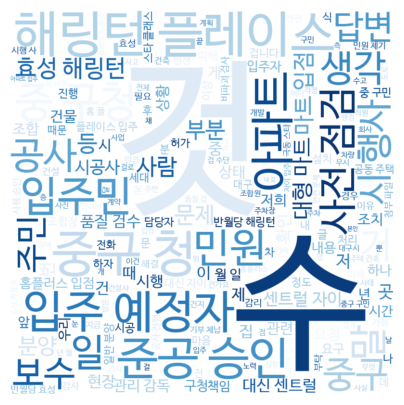


==================== 도시안전국 건축주택과 분석결과 ====================
도시안전국 건축주택과 데이터 수 : 421


Value,조합,조합원,공개,아파트,수,중구,입주,등,정보,대봉,숍,시,것,입주민,예비,년,민원,저희,관련,시공사
Count,1147,986,931,912,864,806,677,672,649,632,603,544,536,517,512,508,505,487,475,470


Value,임무,수요,선제,방안,요새,한통속,송두리,부정과,비리,벌,미연,총원,이젠,결국,협상,내역,구간,장임,바이스,밤잠
Count,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


Type-Token Ratio: 0.03883688813871413


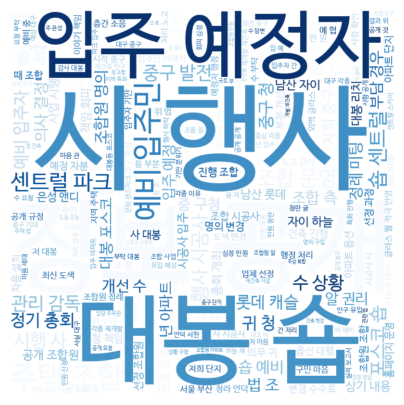


==================== 환경건설국 교통과 분석결과 ====================
환경건설국 교통과 데이터 수 : 405


Value,주차,단속,차,것,차량,일,불법,사람,수,앞,도로,중구,분,시,번,시간,제,주차장,민원,중
Count,1267,901,605,571,540,401,376,342,337,301,294,289,282,262,240,240,236,235,230,228


Value,불법행위,불리,교육세,통닭,명동,소홀,본부,사설,만나,후속,선불,대두,무성,립니,빈자리,종단,조계종,간주,탄압,공손
Count,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


Type-Token Ratio: 0.10488527773519342


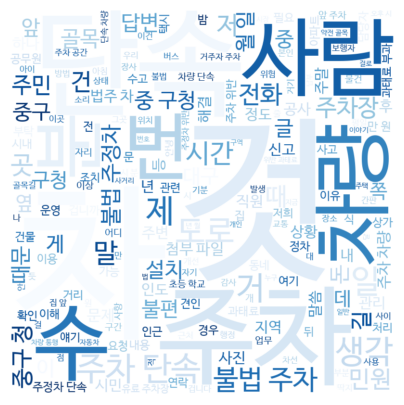


==================== 도시관광국 건설과 분석결과 ====================
도시관광국 건설과 데이터 수 : 134


Value,공사,것,도로,일,앞,수,민원,시,구청,중구,중,차,설치,번,첨부,답변,생각,골목,사람,주민
Count,169,128,125,115,107,101,93,75,75,70,66,65,63,62,58,58,58,57,57,56


Value,사원,방향제,을,별,선도,분야,정치,주장,저촉,사도법,야기,체인,쇠사슬,소유주,대박,모름,냄,숨쉬기,무소용,주범
Count,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


Type-Token Ratio: 0.21475409836065573


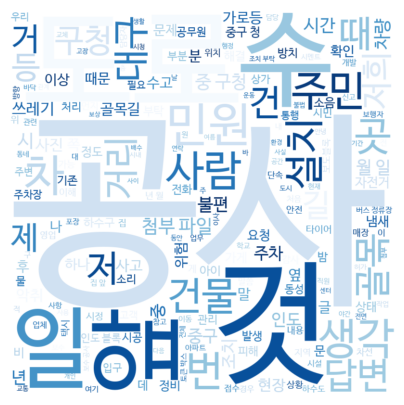


==================== 안전행정국 경제과 분석결과 ====================
안전행정국 경제과 데이터 수 : 115


Value,중구,마트,시장,입점,대형,것,청,홈플러스,중,답변,수,입주,남문,전통,구청,상생,구민,생각,효성,거
Count,493,387,370,278,278,205,184,148,147,125,122,119,108,105,105,98,93,91,89,87


Value,피땀,열기,중제,소신,움직임,기약,이젠,보상법,공원,비용,틀,실제,회복,슬리퍼,타마,성분,양사기,침산,프리미엄,궁리
Count,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


Type-Token Ratio: 0.14920963214655045


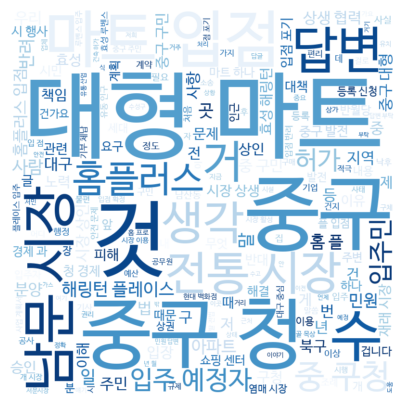


==================== 환경건설국 녹색환경과 분석결과 ====================
환경건설국 녹색환경과 데이터 수 : 102


Value,쓰레기,것,수,공사,소음,중,수거,일,중구,앞,민원,구청,음식물,첨부,제,청소,사람,파일,거,조치
Count,226,127,93,88,86,75,72,60,57,54,53,50,47,46,46,45,45,42,42,41


Value,고,제지,범죄,어린이,수면,종업원,효과,화장품,다중,라지,오랫동안,고민,장시간,무분별,흡연자,활동,교화,종교,담벼락,도입
Count,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


Type-Token Ratio: 0.24230910650815052


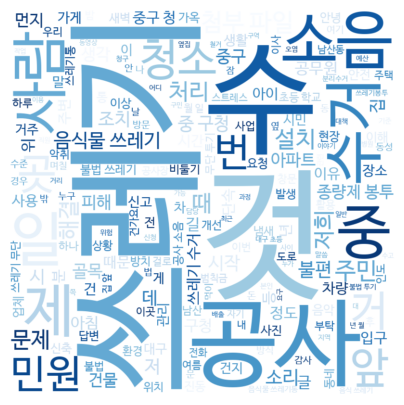


==================== 도시안전국 교통과 분석결과 ====================
도시안전국 교통과 데이터 수 : 92


Value,주차,단속,차량,차,불법,것,수,민원,주정차,도로,설치,일,주차장,앞,중구,분,거주자,시간,생각,답변
Count,398,187,142,120,105,99,93,87,82,81,79,77,75,71,66,61,58,57,56,54


Value,환풍기,적용,소장,배회,관광,안내소,전용,상점,연속,두통,조성,전역,신경질,기침,콧물,눈물,소,초월,설문,당신
Count,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


Type-Token Ratio: 0.17997465145754118


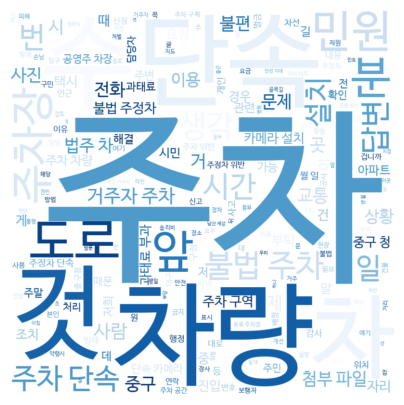


==================== 주민생활지원국 환경과 분석결과 ====================
주민생활지원국 환경과 데이터 수 : 77


Value,것,사람,쓰레기,일,주차,수,말,단속,공사,차량,중구,앞,소음,민원,주민,월,차,생각,저,도로
Count,90,81,81,70,66,61,59,56,50,50,49,48,48,48,44,43,42,41,39,38


Value,도착,교통안전,도우미,급정거,행서,진정서,자장,중간,재난,학인,김,갇,올,우산,문웅,상,화성,감리,모름,증
Count,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


Type-Token Ratio: 0.25455840455840456


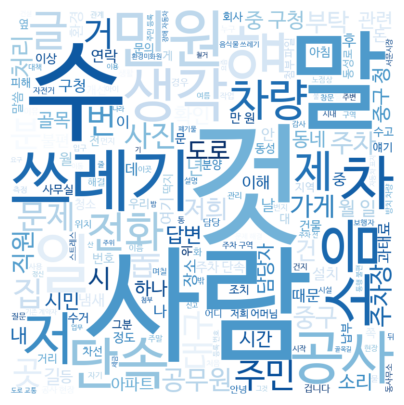


==================== 도시국 도시관리과 분석결과 ====================
도시국 도시관리과 데이터 수 : 72


Value,것,사람,수,중구,주차,차량,공무원,일,앞,공사,년,도로,불법,거,차,거리,단속,중,곳,생각
Count,94,62,59,49,46,46,46,45,43,39,37,36,36,35,32,31,31,31,29,29


Value,견인차,장착,볼일,일쑤,권유가,단순,강제성,불쾌감,표출,구경,의사,표현,손목,성희롱,규제,풍경,딱지,홈페이지,방문,속
Count,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


Type-Token Ratio: 0.29019677362169827


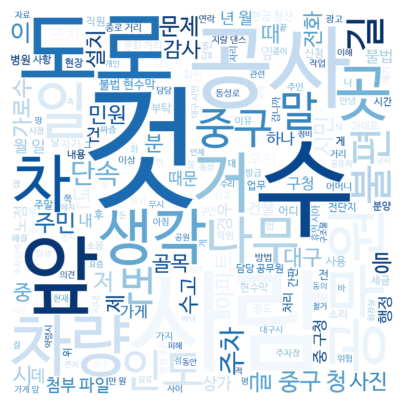


==================== 도시재생국 도시재생과 분석결과 ====================
도시재생국 도시재생과 데이터 수 : 71


Value,것,첨부,가로수,중,민원,파일,사람,앞,광고,불법,중구,물,공사,처리,골목,현수막,나무,구청,부탁,불편
Count,52,45,43,37,36,35,34,33,32,32,31,29,29,28,28,26,25,25,24,24


Value,순간,출장,외,누구,고개,느낌,줄,무시,무렵,달성동,경매,업무,왕래,완료,추석,가족,도장,이사장,서신,디자인
Count,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


Type-Token Ratio: 0.30637422892392047


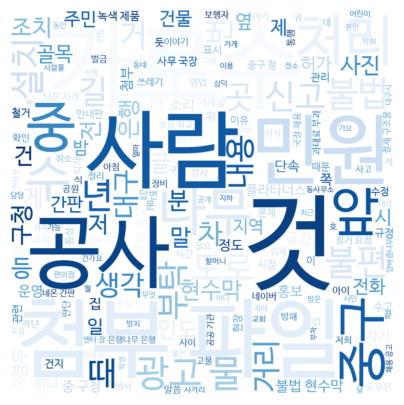

In [ ]:
# 상위 10개의 dept를 분석
for dept in sorted:
    print('='*20, dept, '분석결과', '='*20)
    text_analysis(data, dept)
    print('='*60)
    print()

In [ ]:
# 처리부서 종류
data['dept'].unique()

array(['도시안전국 건설과', '도시안전국 도시재생과', '도시안전국 건축주택과', '도시안전국 교통과',
       '관광경제국 관광진흥과', '보건소 보건과', '관광경제국 환경자원과', '대봉2동', '남산4동',
       '행정복지국 복지정책과', '관광경제국 문화교육과', '관광경제국 일자리경제과', '도시안전국 안전총괄과',
       '행정복지국 민원토지과', '행정복지국 생활지원과', '행정복지국 행정지원과', '봉산문화회관', '보건소 위생과',
       '대신동', '삼덕동', '기획예산실', '홍보소통실', '환경건설국 환경자원과', '환경건설국 교통과',
       '환경건설국 건축주택과', '도시재생국 도시재생과', '환경건설국 안전총괄과', '환경건설국 건설과',
       '도시재생국 문화개발과', '도시재생국 관광자원과', '성내1동', '도시재생국 일자리경제과', '도심활성화지원단',
       '환경건설국 녹색환경과', '환경건설국 건설안전과', '행정복지국 위생과', '성내3동', '도시관광국 건축주택과',
       '행정지원국 경제과', '복지문화국 복지정책과', '복지문화국 문화진흥과', '성내2동', '전략경영실',
       '행정지원국 세무과', '동인동', '행정지원국 행정지원과', '안전행정국 경제과', '안전행정국 안전행정과',
       '복지문화국 가족복지과', '안전행정국 세무과', '도시관광국 건설과', '안전행정국 민원토지과',
       '복지문화국 복지지원과', '주민생활지원국 문화관광과', '주민생활지원국 주민복지과', '주민생활지원국 위생과',
       '도시국 도시관리과', '주민생활지원국 녹색환경과', '행정지원국 종합민원과', '주민생활지원국 환경과',
       '주민생활지원국 주민생활지원과', '대봉1동', '남산1동', '남산2동', '도시국 재난안전과', '총무국 세무과',
       '도시국 교통행정과', '사회산업국 환경관리과', '총무국 총무

In [ ]:
# '~동'으로 끝나는 경우 '동'으로 변경
data.loc[data['dept'].str.endswith('동'), 'dept'] = '동'

data['dept'].unique()

array(['도시안전국 건설과', '도시안전국 도시재생과', '도시안전국 건축주택과', '도시안전국 교통과',
       '관광경제국 관광진흥과', '보건소 보건과', '관광경제국 환경자원과', '동', '행정복지국 복지정책과',
       '관광경제국 문화교육과', '관광경제국 일자리경제과', '도시안전국 안전총괄과', '행정복지국 민원토지과',
       '행정복지국 생활지원과', '행정복지국 행정지원과', '봉산문화회관', '보건소 위생과', '기획예산실',
       '홍보소통실', '환경건설국 환경자원과', '환경건설국 교통과', '환경건설국 건축주택과', '도시재생국 도시재생과',
       '환경건설국 안전총괄과', '환경건설국 건설과', '도시재생국 문화개발과', '도시재생국 관광자원과',
       '도시재생국 일자리경제과', '도심활성화지원단', '환경건설국 녹색환경과', '환경건설국 건설안전과',
       '행정복지국 위생과', '도시관광국 건축주택과', '행정지원국 경제과', '복지문화국 복지정책과',
       '복지문화국 문화진흥과', '전략경영실', '행정지원국 세무과', '행정지원국 행정지원과', '안전행정국 경제과',
       '안전행정국 안전행정과', '복지문화국 가족복지과', '안전행정국 세무과', '도시관광국 건설과',
       '안전행정국 민원토지과', '복지문화국 복지지원과', '주민생활지원국 문화관광과', '주민생활지원국 주민복지과',
       '주민생활지원국 위생과', '도시국 도시관리과', '주민생활지원국 녹색환경과', '행정지원국 종합민원과',
       '주민생활지원국 환경과', '주민생활지원국 주민생활지원과', '도시국 재난안전과', '총무국 세무과',
       '도시국 교통행정과', '사회산업국 환경관리과', '총무국 총무과', '사회산업국 위생과', '총무국 종합민원과',
       '문화공보실'], dtype=object)

In [ ]:
# 새로운 컬럼 dept1(중분류), dept2(소분류) 추가
# 띄어쓰기를 기준 2개의 열로 나눔
split_dept = data['dept'].str.split(' ', n=1, expand=True)

# 두번째 열이 없는 경우 NaN 처리
split_dept[1].fillna(value=np.NaN, inplace=True)

# 기존 데이터프레임에 나눈 열 추가
data[['dept1', 'dept2']] = split_dept

data.head()

,content,dept,length,dept1,dept2
0,달성 공원 새벽시장 근처 환경개선이 시급합니다. 달성 파크푸르지오 힐스테이트 입주...,도시안전국 건설과,246,도시안전국,건설과
1,신축 건물 공사로 인한 안전보호 지난 4월 10일 남산정 마음이 음 공간 설명회에...,도시안전국 도시재생과,1007,도시안전국,도시재생과
2,아파트 건설 현장 주변 아파트 피해 민원 아파트 건설 현장에서 발생하는 소음 먼지...,도시안전국 건축주택과,1167,도시안전국,건축주택과
3,건들 바위 역 4번 출구 인근 교차로 볼록렌즈 교체 요청 대구광역시 중구 명덕로 ...,도시안전국 교통과,169,도시안전국,교통과
4,경북대학교병원 응급실 앞 노상주차장 이용 2023년 4월 5일 08:00-17:3...,도시안전국 교통과,635,도시안전국,교통과


도시관광국       767
환경건설국       632
도시안전국       585
주민생활지원국     185
도시재생국       133
안전행정국       131
관광경제국       120
행정지원국       103
도시국          88
보건소          69
총무국          54
행정복지국        48
기획예산실        30
동            30
복지문화국        24
전략경영실        11
사회산업국         7
봉산문화회관        4
도심활성화지원단      1
홍보소통실         1
문화공보실         1
Name: dept1, dtype: int64


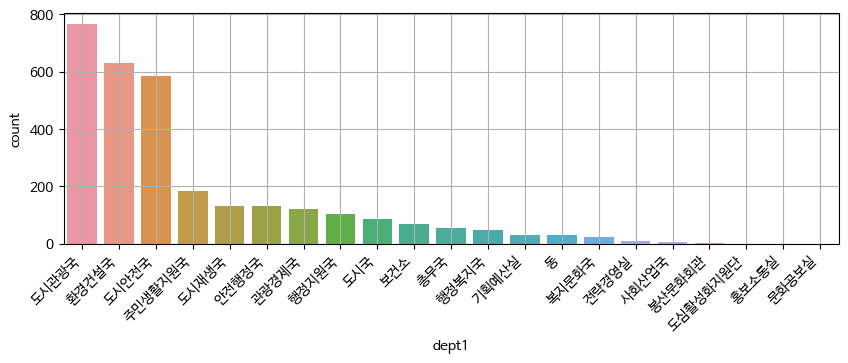

In [ ]:
# 'dept1' 열 확인
eda1_c(data, 'dept1')

건축주택과      1104
교통과         497
건설과         193
경제과         171
녹색환경과       117
도시재생과        98
환경과          77
도시관리과        72
보건과          61
문화교육과        60
총무과          52
위생과          51
관광자원과        47
건설안전과        47
환경자원과        42
문화관광과        41
행정지원과        30
문화진흥과        21
일자리경제과       20
종합민원과        19
주민복지과        19
민원토지과        18
교통행정과        15
관광진흥과        14
복지정책과        14
세무과           9
주민생활지원과       8
문화개발과         7
안전행정과         6
안전총괄과         6
환경관리과         5
생활지원과         2
복지지원과         1
재난안전과         1
가족복지과         1
Name: dept2, dtype: int64


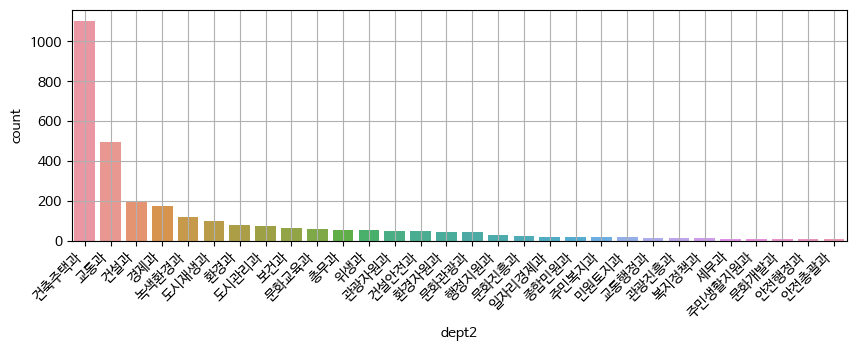

In [ ]:
# 'dept2' 열 확인
eda1_c(data, 'dept2')

In [ ]:
def text_analysis(df, dept):
    # 1. 지정한 dept의 content만 리스트로 추출 -> text_list
    if dept == None:
        text_list = list(df['content'])
    else : 
        text_list = list(df.loc[df['dept1']==dept, 'content'])
    print(f'{dept} 데이터 수 : {len(text_list)}')

    # 2. 분석기로는 mecab 사용
    mecab = MeCab()

    # 3. 명사 추출하여 띄어쓰기 단위로 구분
    for idx, sentence in enumerate(text_list) :
        text_list[idx] = " ".join(mecab.nouns(sentence))

    # 4. 토큰 별 개수를 표로 출력하기
    texts = ' '.join(text_list) # 클래스 구분 없이 하나의 문장으로 전부 합치기
    words = texts.split() # 단어가 띄어쓰기로 구분되어 있으니 나누기
    count = Counter(words)

    count_df = pd.DataFrame.from_dict(count, orient='index', columns=['Count']) # Counter 객체를 pandas의 DataFrame으로 변환
    count_df.index.name = 'Value' # 인덱스 이름 설정
    count_df = count_df.sort_values(by='Count', ascending=False) # 내림차순으로 정렬

    display(count_df.head(20).transpose()) # 상위 20 단어 출력
    display(count_df.tail(20).transpose()) # 하위 20 단어 출력

    # 5. nltk 텍스트로 분석하기
    text = ' '.join(text_list) # 클래스 구분 없으 하나의 문장으로 전부 합치기
    tokens = nltk.word_tokenize(text)
    text_obj = nltk.Text(tokens) # 텍스트 데이터를 nltk의 Text 객체로 변환

    # 6. Type-Token Ratio 계산하고 출력
    ttr = len(set(text_obj)) / len(text_obj)
    print("Type-Token Ratio:", ttr) # 낮으면 해당 주제와 관련된 단어만 사용한다(언어가 다양하지 않다)

    # 7. word cloud 출력
    FONT_PATH = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
    text = ' '.join(text_list) # 클래스 구분 없으 하나의 문장으로 전부 합치기
    wordcloud = WordCloud(width=800, 
                            height=800, 
                            background_color="white", 
                            colormap="Blues", 
                            font_path=FONT_PATH).generate(text) # WordCloud 객체 생성

    plt.figure(figsize=(5,5)) # 시각화
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [ ]:
# dept1 값을 리스트로 저장
sorted = data['dept1'].value_counts().index

In [ ]:
# dept1를 분석
for dept in sorted:
    print('='*20, dept, '분석결과', '='*20)
    text_analysis(data, dept)
    print('='*60)
    print()

Output hidden; open in https://colab.research.google.com to view.